In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/brianbg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls', header=1)

In [3]:
# Verifica el sistema: ¿Coinciden las dimensiones con lo esperado?
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras filas:")
print(df.head())
print("\nResumen estadístico:")
print(df.describe())

Dimensiones del dataset: (30000, 25)

Primeras filas:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6 

In [4]:
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)

In [6]:
target_dist = df['DEFAULT'].value_counts(normalize=True)
print(f"\nDistribución del target (Default):\n{target_dist}")


Distribución del target (Default):
DEFAULT
0    0.7788
1    0.2212
Name: proportion, dtype: float64


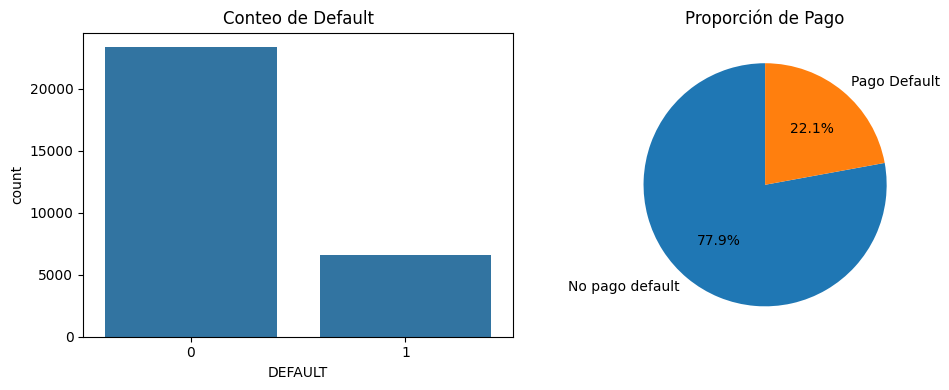

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# Gráfico de conteo
sns.countplot(data=df, x='DEFAULT', ax=ax[0])
ax[0].set_title('Conteo de Default')
# Gráfico de torta (opcional, para visualizar el %)
ax[1].pie(target_dist.values, labels=['No pago default', 'Pago Default'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Proporción de Pago')
plt.tight_layout()
plt.show()

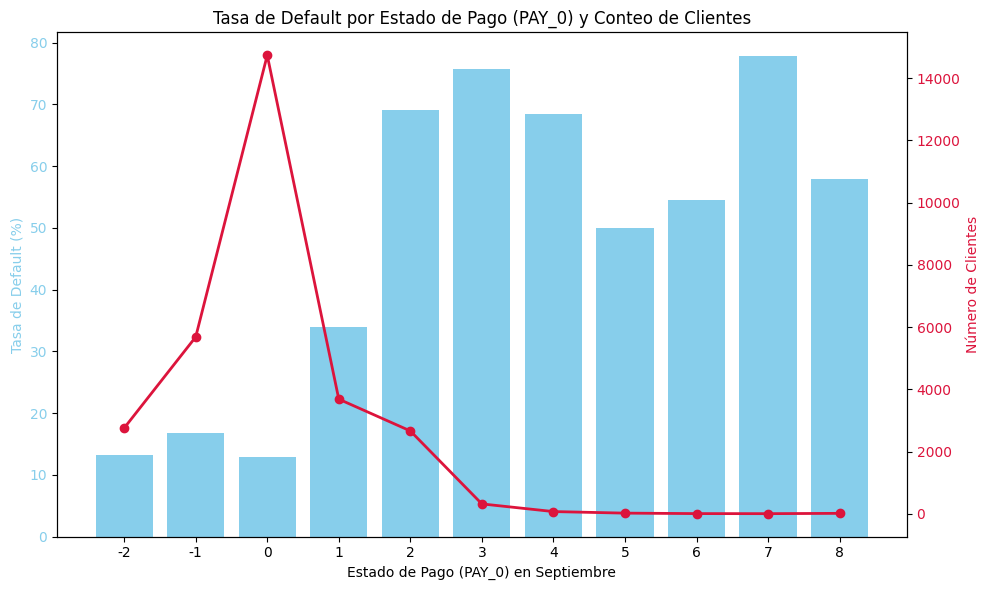

In [13]:
plt.figure(figsize=(10, 6))
# Usamos un gráfico de barras que muestra la PROPORCIÓN de default por categoría
pay_0_default_rate = df.groupby('PAY_0')['DEFAULT'].mean().sort_index()
pay_0_counts = df['PAY_0'].value_counts().sort_index()
ax1 = plt.gca()
bars = ax1.bar(pay_0_default_rate.index.astype(str), pay_0_default_rate.values * 100, color='skyblue')
ax1.set_xlabel('Estado de Pago (PAY_0) en Septiembre')
ax1.set_ylabel('Tasa de Default (%)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Tasa de Default por Estado de Pago (PAY_0) y Conteo de Clientes')
ax2 = ax1.twinx()
ax2.plot(pay_0_default_rate.index.astype(str), pay_0_counts.values, color='crimson', marker='o', linewidth=2)
ax2.set_ylabel('Número de Clientes', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.tight_layout()
plt.show()

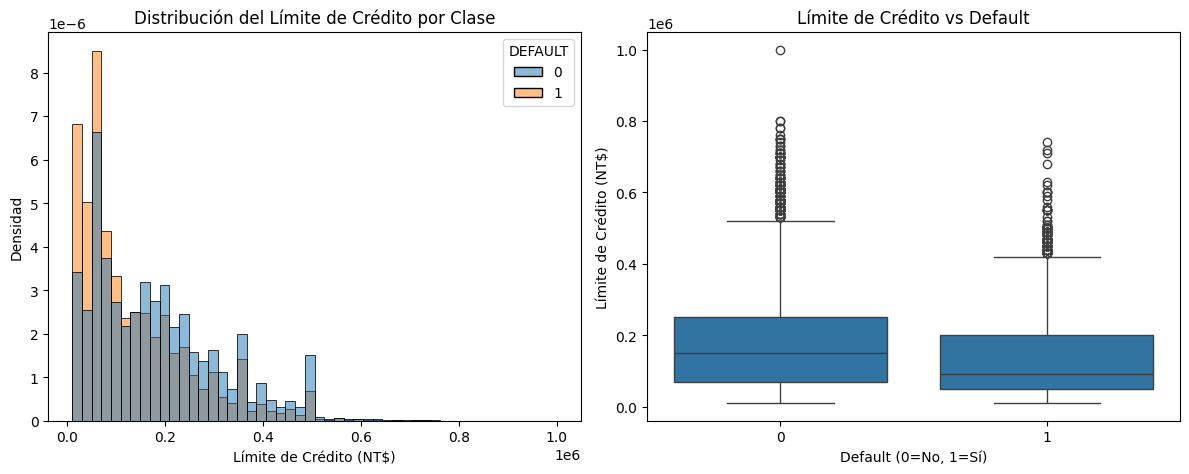

In [14]:
# LIMIT_BAL: Límite de crédito dado. ¿Los clientes con límite más bajo tienen más riesgo?
plt.figure(figsize=(12, 5))
# Histograma separado por clase
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LIMIT_BAL', hue='DEFAULT', bins=50, stat='density', common_norm=False)
plt.title('Distribución del Límite de Crédito por Clase')
plt.xlabel('Límite de Crédito (NT$)')
plt.ylabel('Densidad')

# Boxplot para ver mediana y dispersión
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='DEFAULT', y='LIMIT_BAL')
plt.title('Límite de Crédito vs Default')
plt.xlabel('Default (0=No, 1=Sí)')
plt.ylabel('Límite de Crédito (NT$)')
plt.tight_layout()
plt.show()